# Exploring different kinds of dark matter

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import lenstronomy
from pyHalo.preset_models import WDM, CDM


ImportError: cannot import name 'simps' from 'scipy.integrate' (/usr/local/Caskroom/miniconda/base/envs/bsa/lib/python3.12/site-packages/scipy/integrate/__init__.py)

In [ ]:
##some parameters to set for the whole file:
kwargs_concentration_model_subhalos = {'scatter': False}
kwargs_concentration_model_fieldhalos = {'scatter': False}


## these parameters adjust where the halos will be generated 
### Note that we are simulating a universe with one big galaxy (like the Milky Way) as well as many smaller galaxies. The distance between us and the big galaxy is 'zlens' and the full distance we are simulating is controlled by 'zsource'.

In [ ]:

###after you've done everything else in the notebook, you can see what happens when you change these variables:
cone_opening_angle = 8
log_mlow_var = 5
zsource_variable = 2


## Cold Dark Matter (CDM)
Cold dark matter theory predicts that the number of dark matter halos increases, so that you always have more low-mass halos than higher mass halos


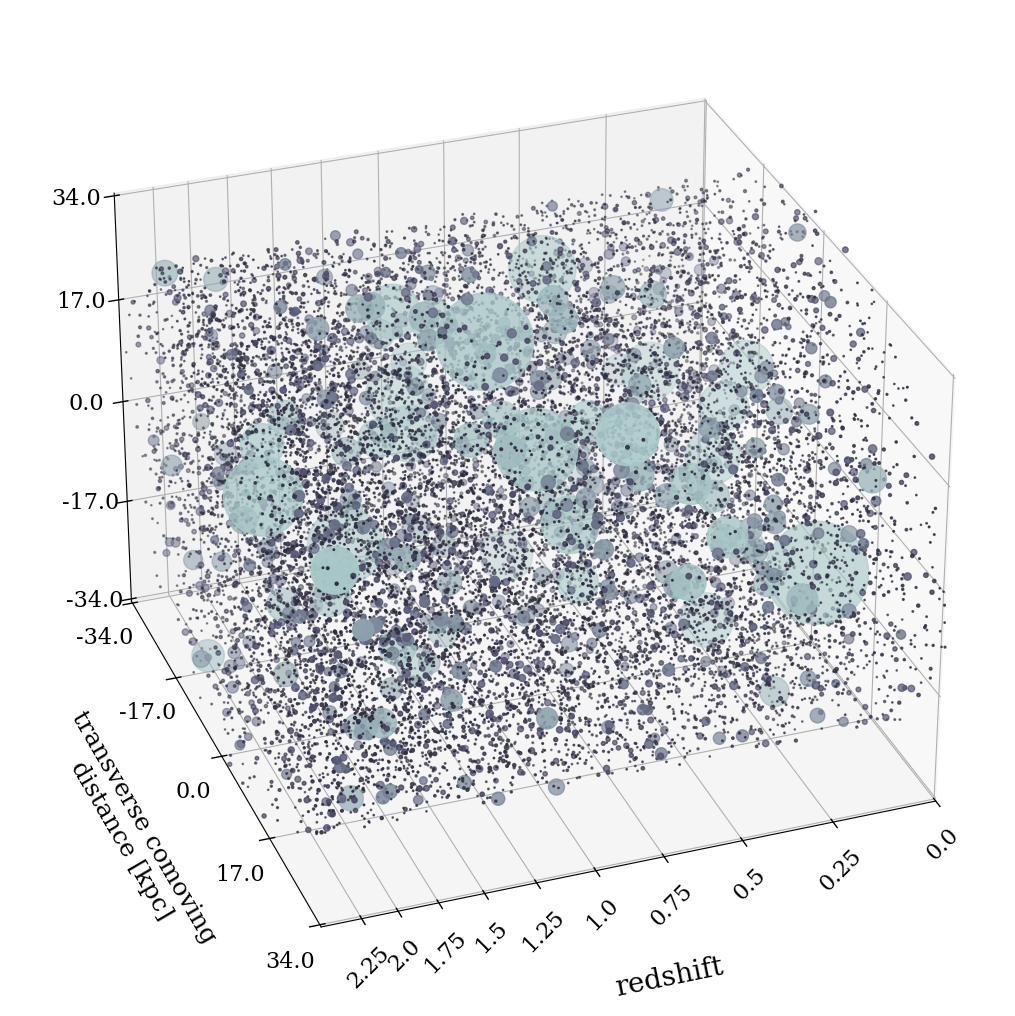

In [ ]:
## don't adjust anything in this cell
###this cell generates a realization of many cold dark matter halos in the universe and plots them 

realizationCDM = CDM(0.5, zsource_variable, cone_opening_angle_arcsec=cone_opening_angle, geometry_type='CYLINDER', 
                     sigma_sub=0, log_mlow=log_mlow_var)

cdm_plot = CDM(0.5, zsource, cone_opening_angle_arcsec=cone_opening_angle, 
                     geometry_type='CYLINDER', sigma_sub=0.0)

fig = plt.figure(1)
fig.set_size_inches(16, 12)
ax = plt.subplot(111, projection='3d')
cdm_plot.plot(ax)

## Q: Describe what you see.

## Q: Are there more small halos or big halos? What would this look like in a histogram approximately?

## Warm dark matter (WDM)
1) Try adjusting the 'log-mc' parameter (between 1-10). What happens to the red line in the plot below when you make this number bigger? What happens when you make it smaller?


In [ ]:
##parameters you can change (after running through one time). Copy and paste this with new variables in your own notebook.

log_mc_variable = 8

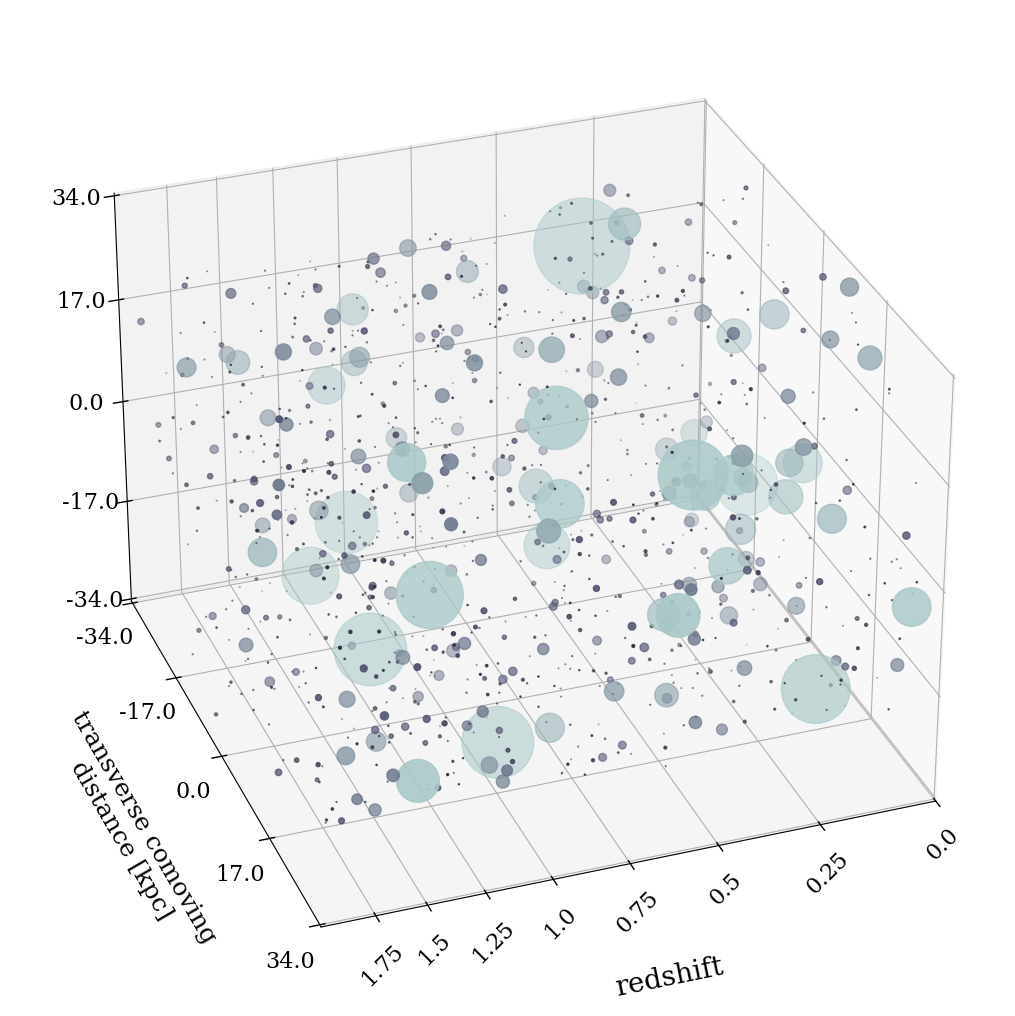

In [ ]:

##don't change anythiing in this cell


realizationWDM = WDM(0.5, zsource_variable, log_mc=log_mc_variable, cone_opening_angle_arcsec=cone_opening_angle, log_mlow=log_mlow_var,
                     geometry_type='CYLINDER', sigma_sub=0)

wdm_plot = WDM(0.5, zsource_variable, log_mc=log_mc_variable, cone_opening_angle_arcsec=cone_opening_angle, 
                     geometry_type='CYLINDER', sigma_sub=0.0)

fig = plt.figure(1)
fig.set_size_inches(16, 12)
ax = plt.subplot(111, projection='3d')
realizationWDM.plot(ax)


## Q: Describe what you see.

## Q: How do these dark matter halos look different from the cold dark matter halos? 

In [ ]:
##this cell will make a histogram to compare the number as a function of mass

#print('realization contains '+str(len(realizationWDM.halos))+' halos.')
wdm_halo_masses = [halo.mass for halo in realizationWDM.halos]
N, m = np.histogram(wdm_halo_masses, bins=np.logspace(5, 10, 15))

cdm_halo_masses = [halo.mass for halo in realizationCDM.halos]
Ncdm, mcdm = np.histogram(cdm_halo_masses, bins=np.logspace(5, 10, 15))




Text(0, 0.5, 'number of halos as a function of Mass')

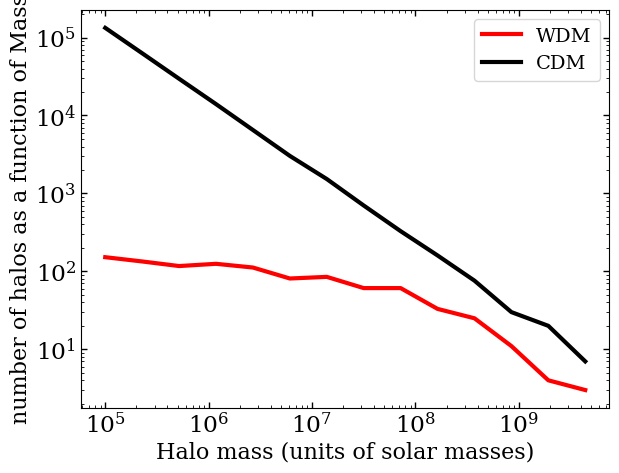

In [ ]:
###here we are plotting the Warm Dark Matter halos and the Cold Dark Matter halos in a histogram together so we can see them
plt.loglog(m[0:-1], N, color='r',label = 'WDM')
plt.loglog(mcdm[0:-1], Ncdm, color='k',label = 'CDM')
plt.legend()
plt.xlabel('Halo mass (units of solar masses)', fontsize=16)
plt.ylabel('number of halos as a function of Mass', fontsize=16)

# 3) Plot 2 different warm dark matter mass functions AND a cold dark matter mass function.
For the two warm dark matter mass functions change log_mc.